## Investigating collisions in reasoning-gym datasets

This notebook helps to investigate collisions in training and validation datasets generated with different seeds as intended to be used for RL training.

In [1]:
# !pip install aiofiles nest_asyncio pandas

In [2]:
import reasoning_gym

In [3]:
with open("./collisions/data.txt") as f:
    data_names = f.readlines()
    data_names = [name.strip() for name in data_names]
    print("Total number of data: ", len(data_names))

Total number of data:  2


In [4]:
data_names

['maze', 'sokoban']

In [6]:
TOTAL = 10000
collisions = []

In [ ]:
%%time
for name in data_names:
    data_1 = reasoning_gym.create_dataset(name, size=TOTAL, seed=1)
    data_2 = reasoning_gym.create_dataset(name, size=TOTAL, seed=2)
    count = 0
    for item_1, item_2 in zip(data_1, data_2):
        if item_1["question"] == item_2["question"]:
            count += 1

    # Add name, count to collisions.txt
    with open('./collisions/collisions_1.txt', 'a') as file:
        file.write(f"{name}, {count}\n")

# Report on collisions data generated

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
with open('./collisions/collisions.txt', 'r') as file:
    lines = file.readlines()

data = [lines.strip().split(", ") for lines in lines]

In [5]:
df = pd.DataFrame([[name, collision] for name, collision in data], columns=["name", "collisions"])

In [6]:
# Change collision to int
df["collisions"] = df["collisions"].astype(int)

In [7]:
df.head(5)

,name,collisions
0,complex_arithmetic,0
1,intermediate_integration,12
2,polynomial_equations,0
3,polynomial_multiplication,0
4,simple_equations,0


In [8]:
print("Total number of data: ", len(df))

Total number of data:  99


In [9]:
# Filter out non-zero collision entries
df_zero_collision = df[df["collisions"] == 0]

In [10]:
print("The number of data with zero collision: ", len(df_zero_collision))
print("Percentage of data with zero collision: ", len(df_zero_collision) / len(df))

The number of data with zero collision:  76
Percentage of data with zero collision:  0.7676767676767676


In [11]:
# Filter out zero collision entries
df_non_zero_collision = df[df["collisions"] > 0]

In [12]:
print("The number of data with non-zero collision: ", len(df_non_zero_collision))
print("Percentage of data with non-zero collision: ", len(df_non_zero_collision) / len(df))

The number of data with non-zero collision:  23
Percentage of data with non-zero collision:  0.23232323232323232


## Visualize datasets with collisions data

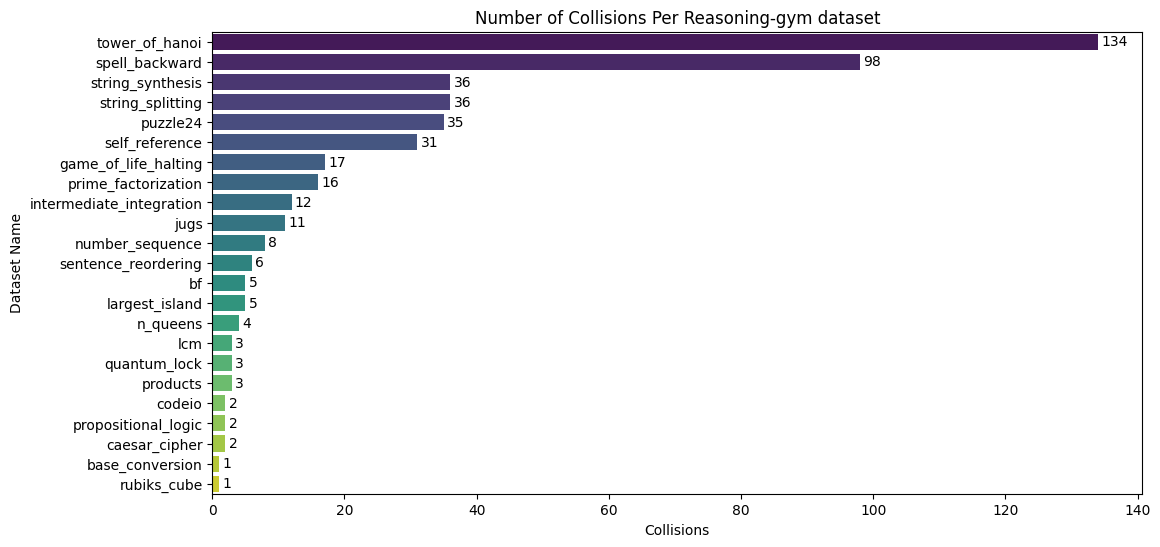

In [13]:
# Sort values for better visualization
df_non_zero_collision = df_non_zero_collision.sort_values(by="collisions", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    y="name", 
    x="collisions", 
    hue="name",  # Assign hue to the y-variable
    data=df_non_zero_collision, 
    palette="viridis", 
    legend=False  # Hide legend since hue is just for color mapping
)

# Annotate bars with their values
for index, value in enumerate(df_non_zero_collision["collisions"]):
    ax.text(value + 0.5, index, str(value), va='center', fontsize=10, color='black')

# Labels and title
plt.xlabel("Collisions")
plt.ylabel("Dataset Name")
plt.title("Number of Collisions Per Reasoning-gym dataset")
plt.show()